Import Libraries


In [1228]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

from sklearn.preprocessing import LabelEncoder
 

Read Data

In [1229]:
data = pd.read_csv(r"C:\Users\mostafa\Downloads\car_price_prediction.csv\car_price_prediction.csv")

Explore The Data

In [1230]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [1231]:
data.shape

(19237, 18)

In [1232]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [1233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [1234]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


Clean And Preprocessing  Data 

In [1235]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [1236]:
data.duplicated().sum()

313

In [1237]:
data.drop_duplicates(inplace=True)

In [1238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

Analysis

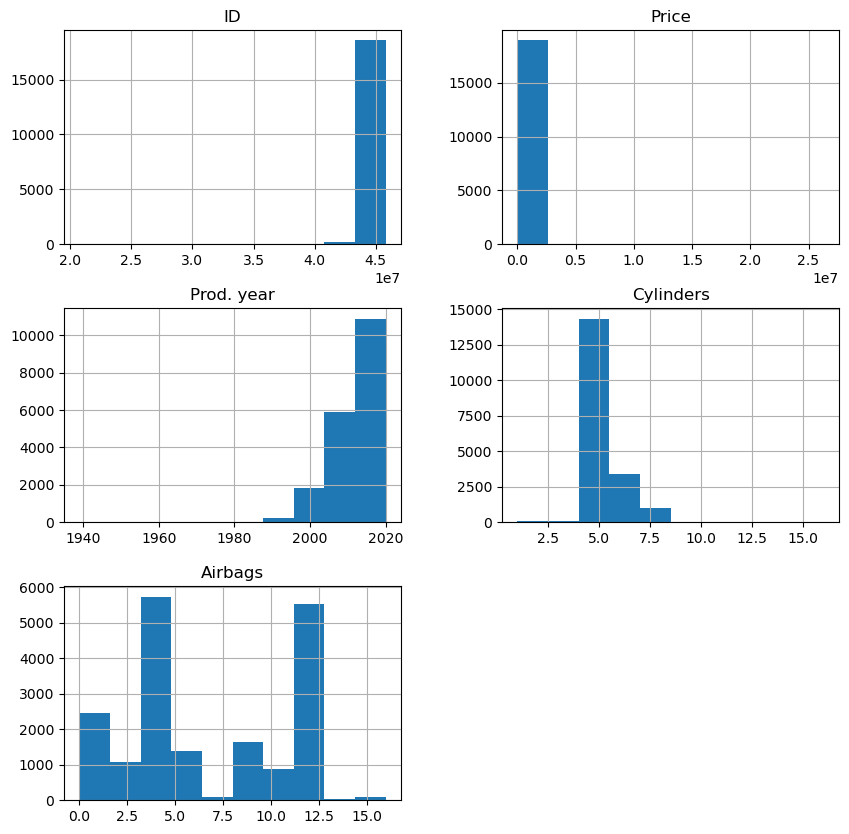

In [1239]:
data.hist(figsize=(10,10))
plt.show()

In [1240]:
for i in data.columns:
    print(i ,': ' , data[i].nunique())

ID :  18924
Price :  2315
Levy :  559
Manufacturer :  65
Model :  1590
Prod. year :  54
Category :  11
Leather interior :  2
Fuel type :  7
Engine volume :  107
Mileage :  7687
Cylinders :  13
Gear box type :  4
Drive wheels :  3
Doors :  3
Wheel :  2
Color :  16
Airbags :  17


In [1241]:
top10cars = data.Manufacturer.value_counts().sort_values(ascending=False)[ : 10]
top10cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

<Axes: xlabel='Manufacturer'>

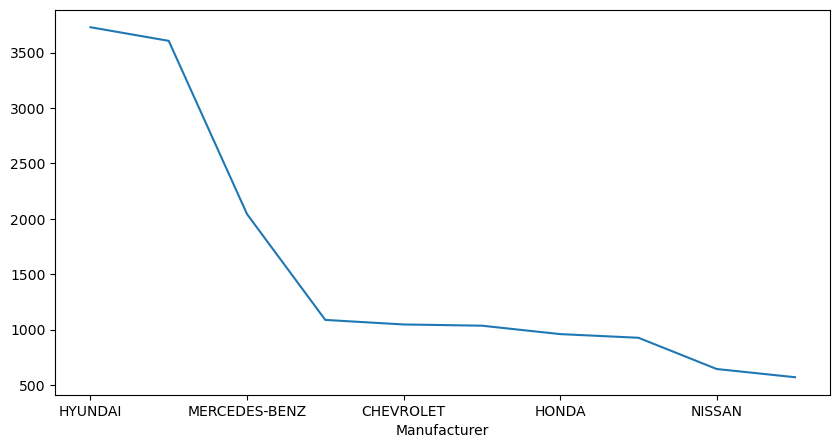

In [1242]:
top10cars.plot(figsize=(10,5))

In [1243]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [1244]:
top10carsPrices = [data[data.Manufacturer == car]["Price"].mean() for car in list(top10cars.index)]
top10carsPrices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

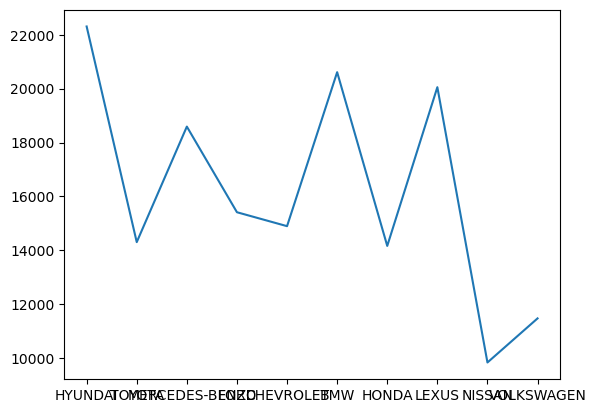

In [1245]:
plt.plot(top10cars.index , top10carsPrices)

In [1246]:
numiric_data = data.select_dtypes('int')

<Axes: >

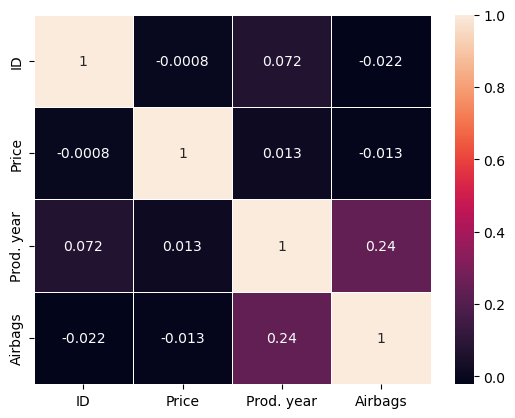

In [1247]:
sns.heatmap(numiric_data.corr() , annot=True , linewidths=0.5)

In [1248]:
object_data = data.select_dtypes('object')

In [1249]:
object_data

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


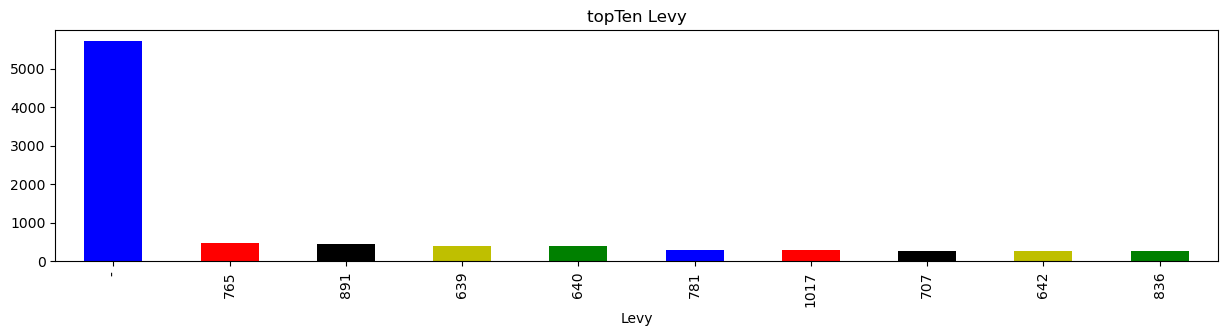

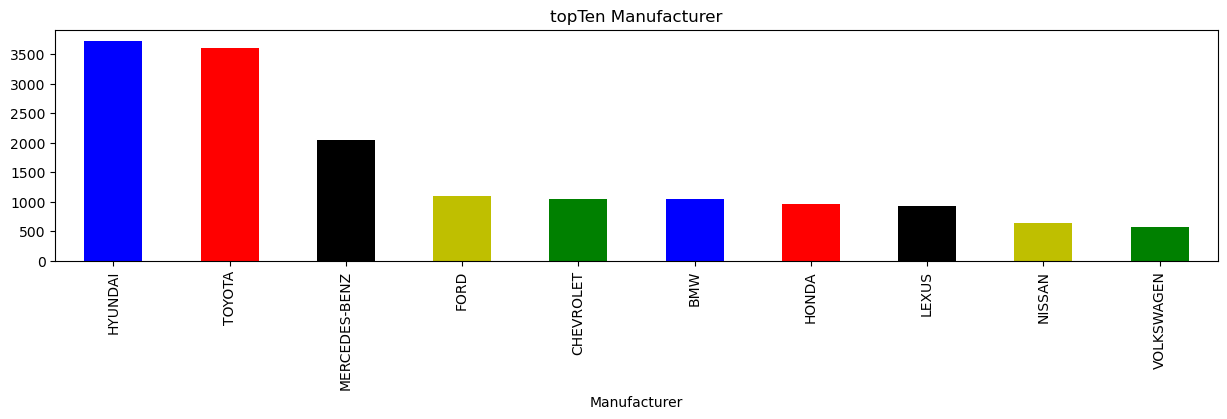

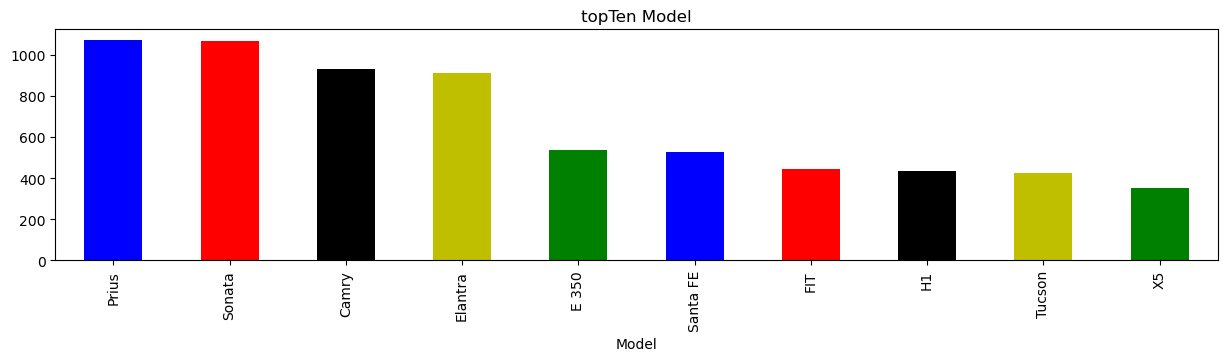

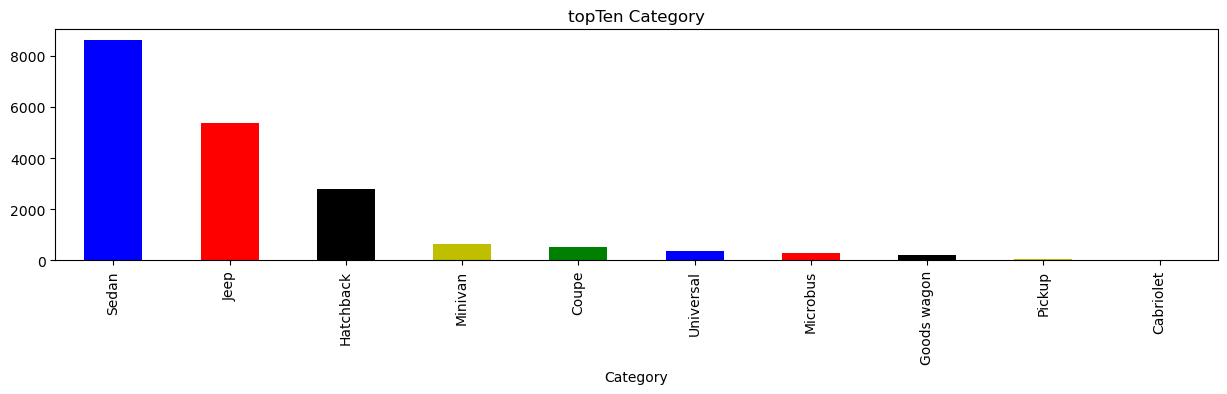

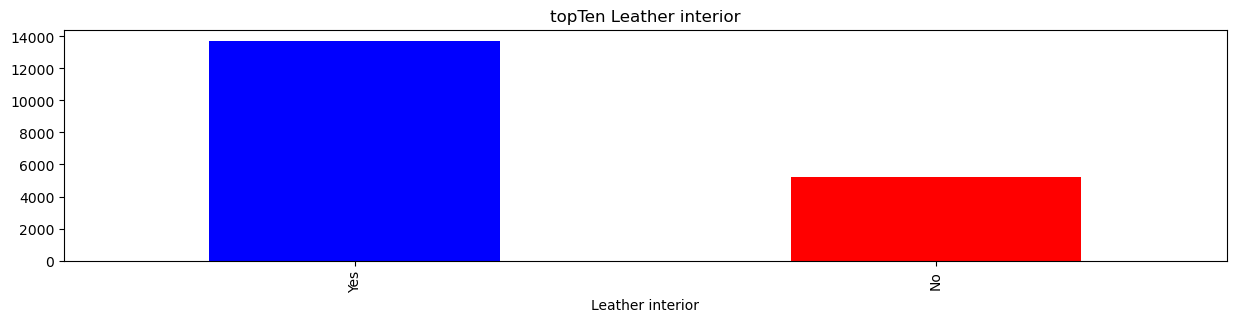

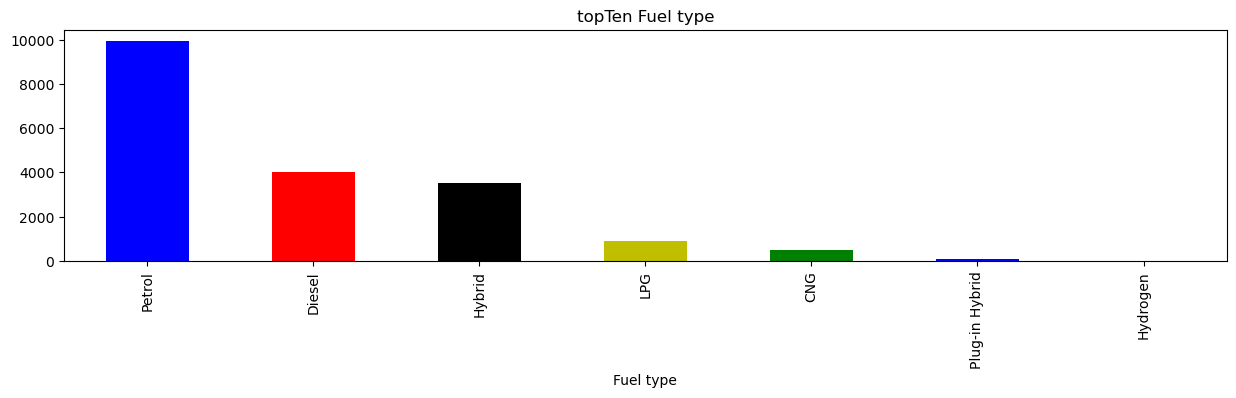

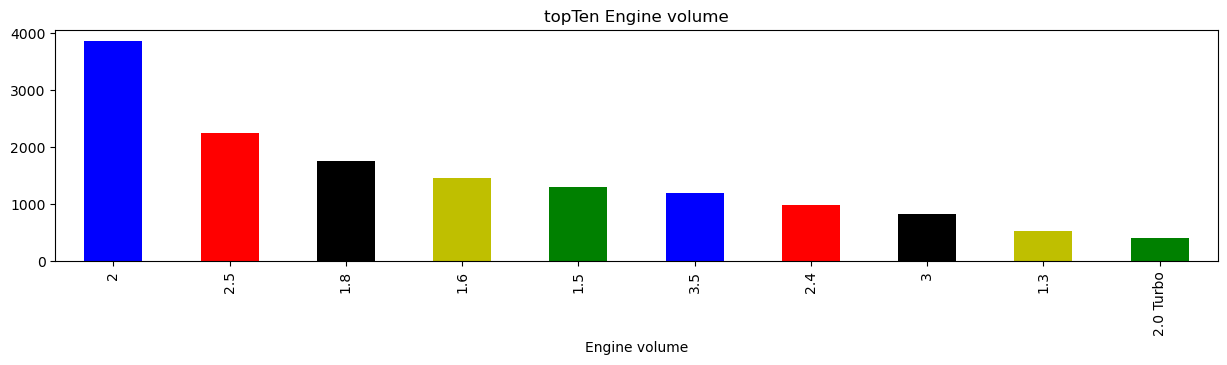

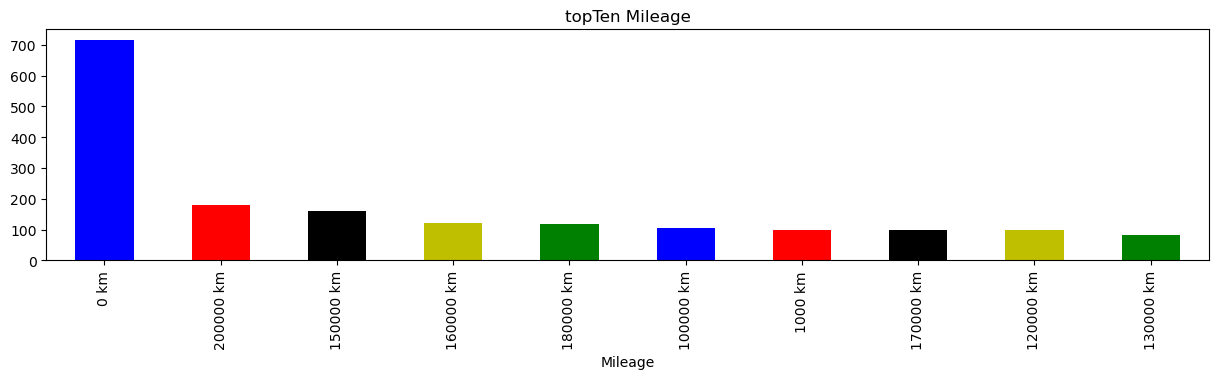

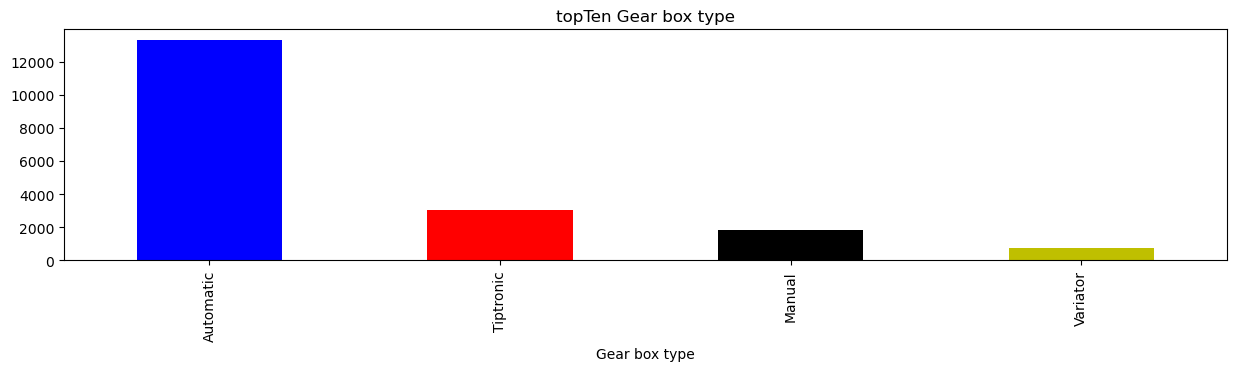

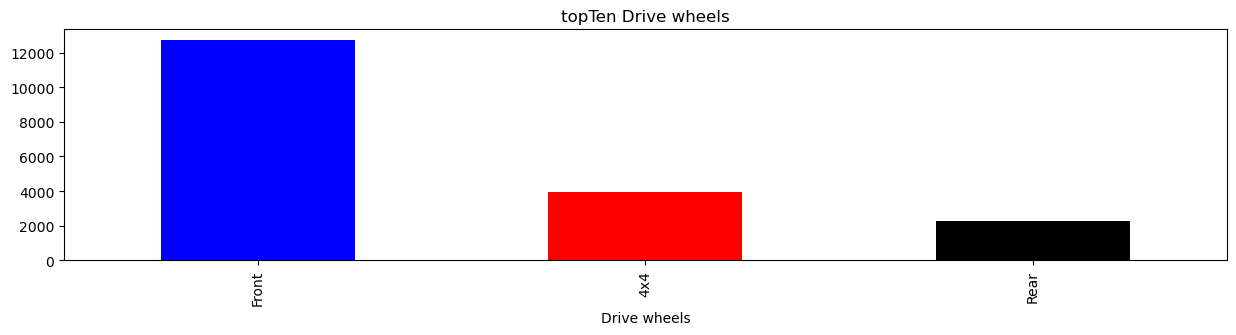

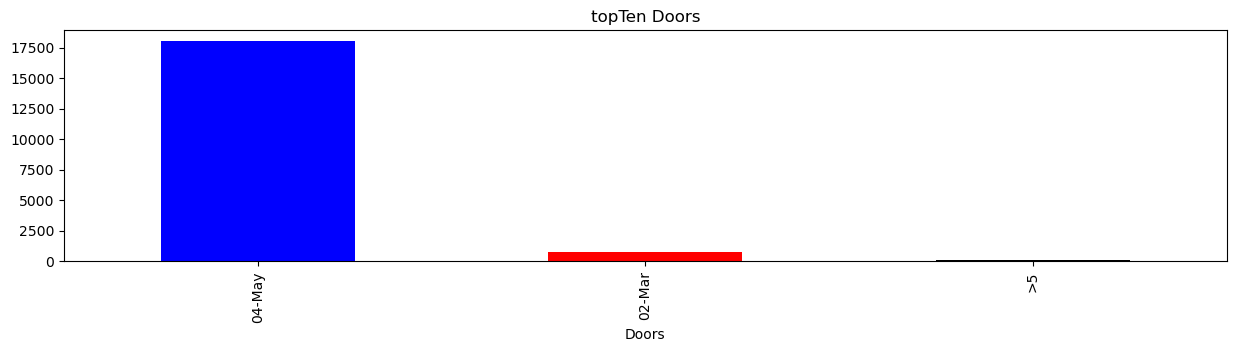

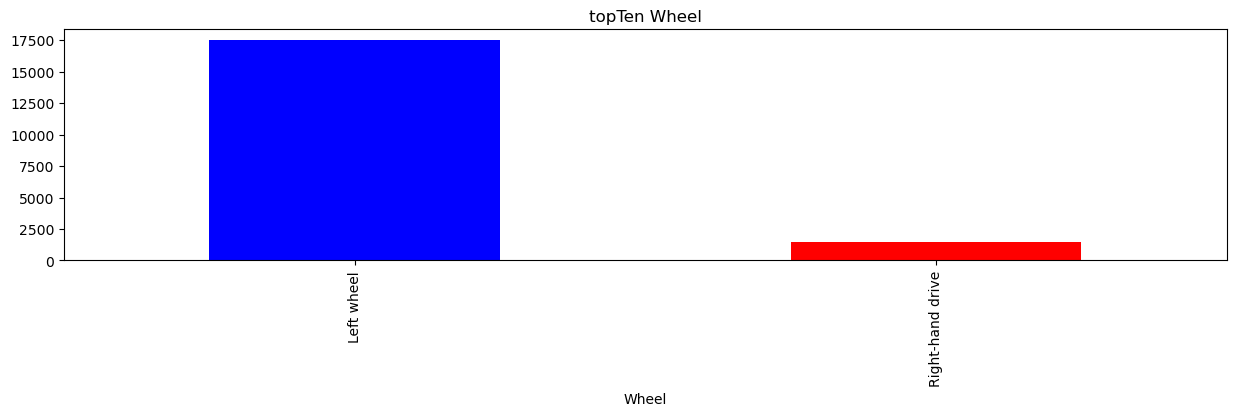

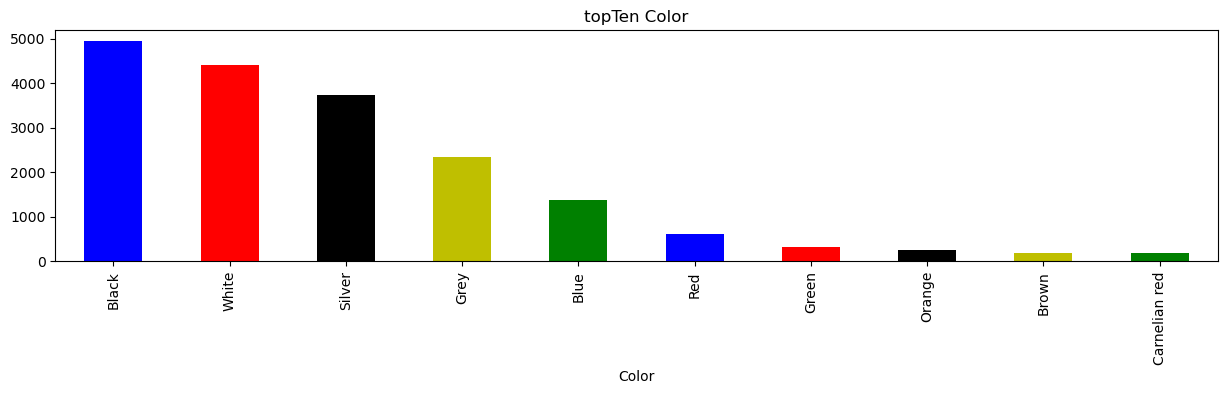

In [1250]:
for col in object_data:
    plt.figure(figsize=(15, 3))
    colors = ['b' , 'r' , 'k' , 'y' , 'g']
    topTen = data[col].value_counts().nlargest(10)
    topTen.plot(kind='bar' , color=colors)
    plt.title('topTen ' + col)
    plt.show()

Data Processing

In [1251]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [1252]:
data = data.drop(["ID" ,"Doors"] , axis =1 )

Date Column

In [1253]:
import datetime 
nowDate = datetime.datetime.now()
nowDate

datetime.datetime(2025, 2, 16, 0, 46, 38, 50285)

In [1254]:
data["Prod. year"] = data["Prod. year"].astype("int")

In [1255]:
data['carAge'] =nowDate.year - data["Prod. year"] 
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,carAge
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,26
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,14
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,15
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4,18


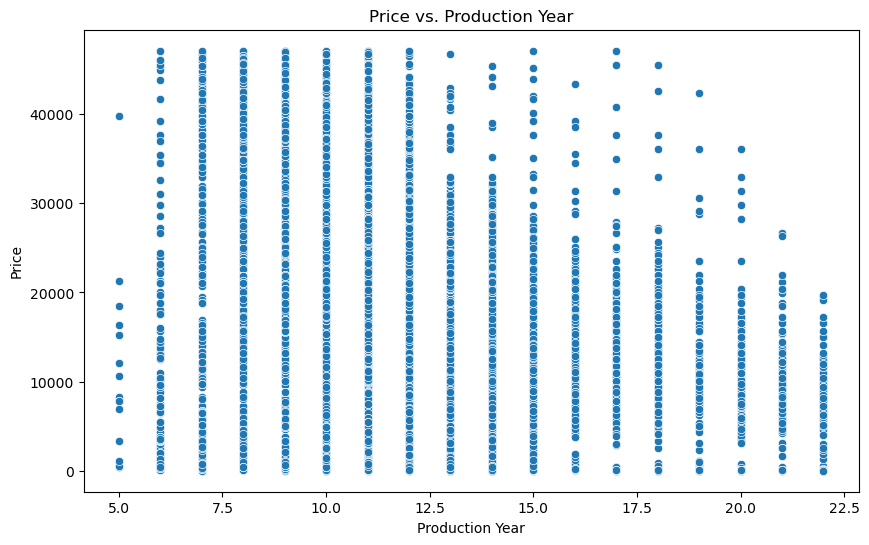

In [1302]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carAge', y='Price', data=data)
plt.title('Price vs. Production Year')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.show()

In [1256]:
data = data.drop("Prod. year" , axis=True)

In [1257]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,carAge
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11


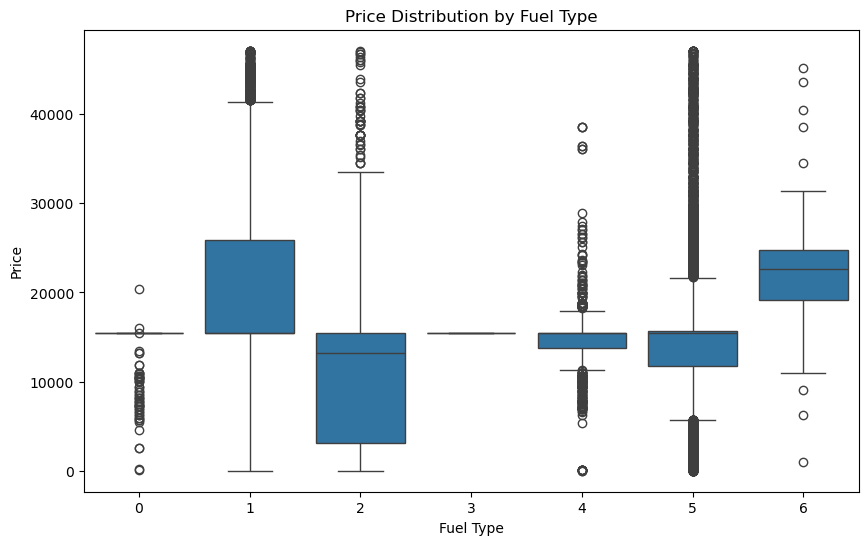

In [1303]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel type', y='Price', data=data)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

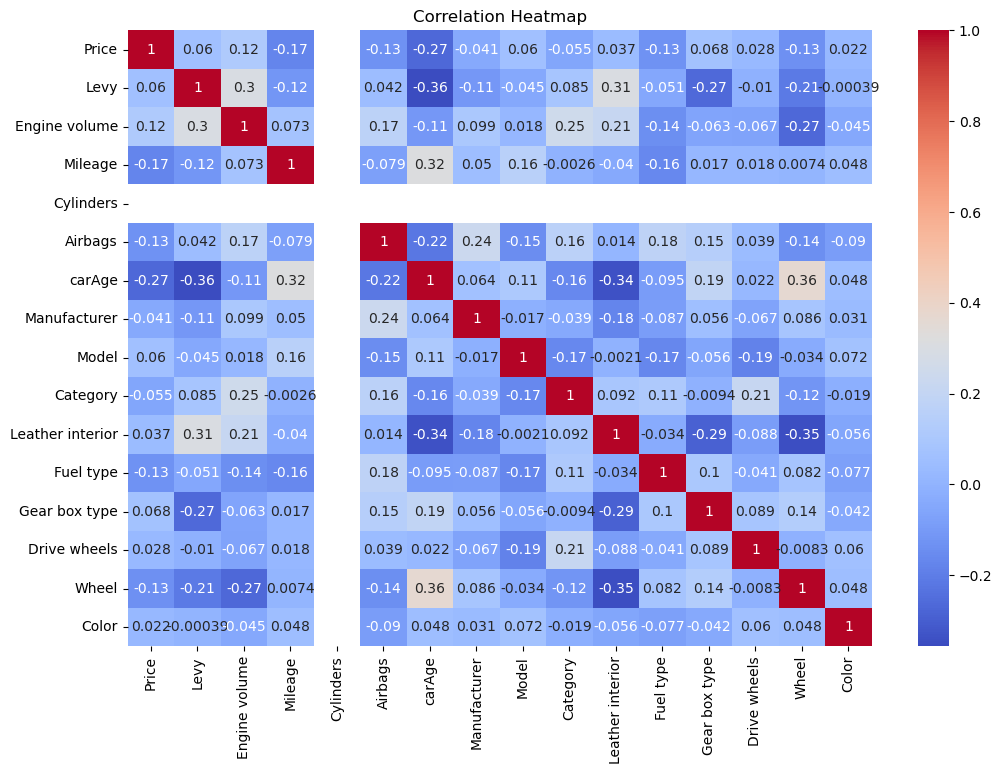

In [1304]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

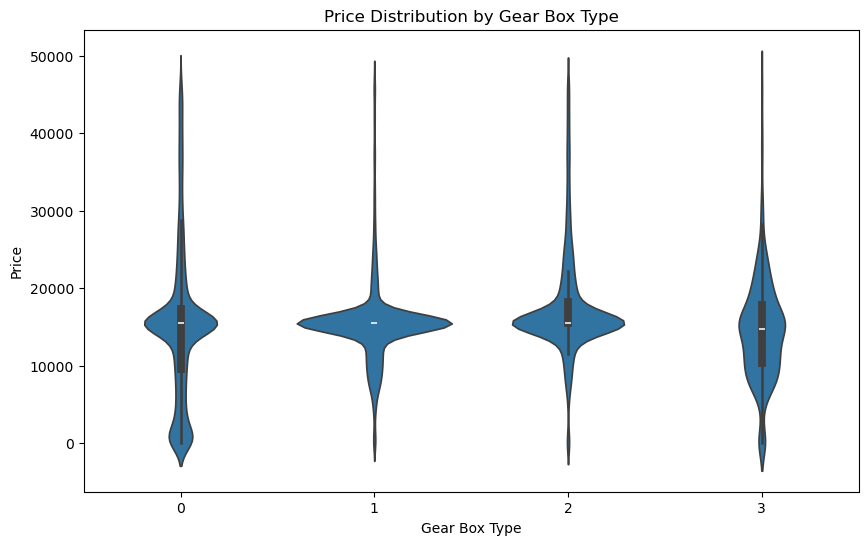

In [1306]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gear box type', y='Price', data=data)
plt.title('Price Distribution by Gear Box Type')
plt.xlabel('Gear Box Type')
plt.ylabel('Price')
plt.show()

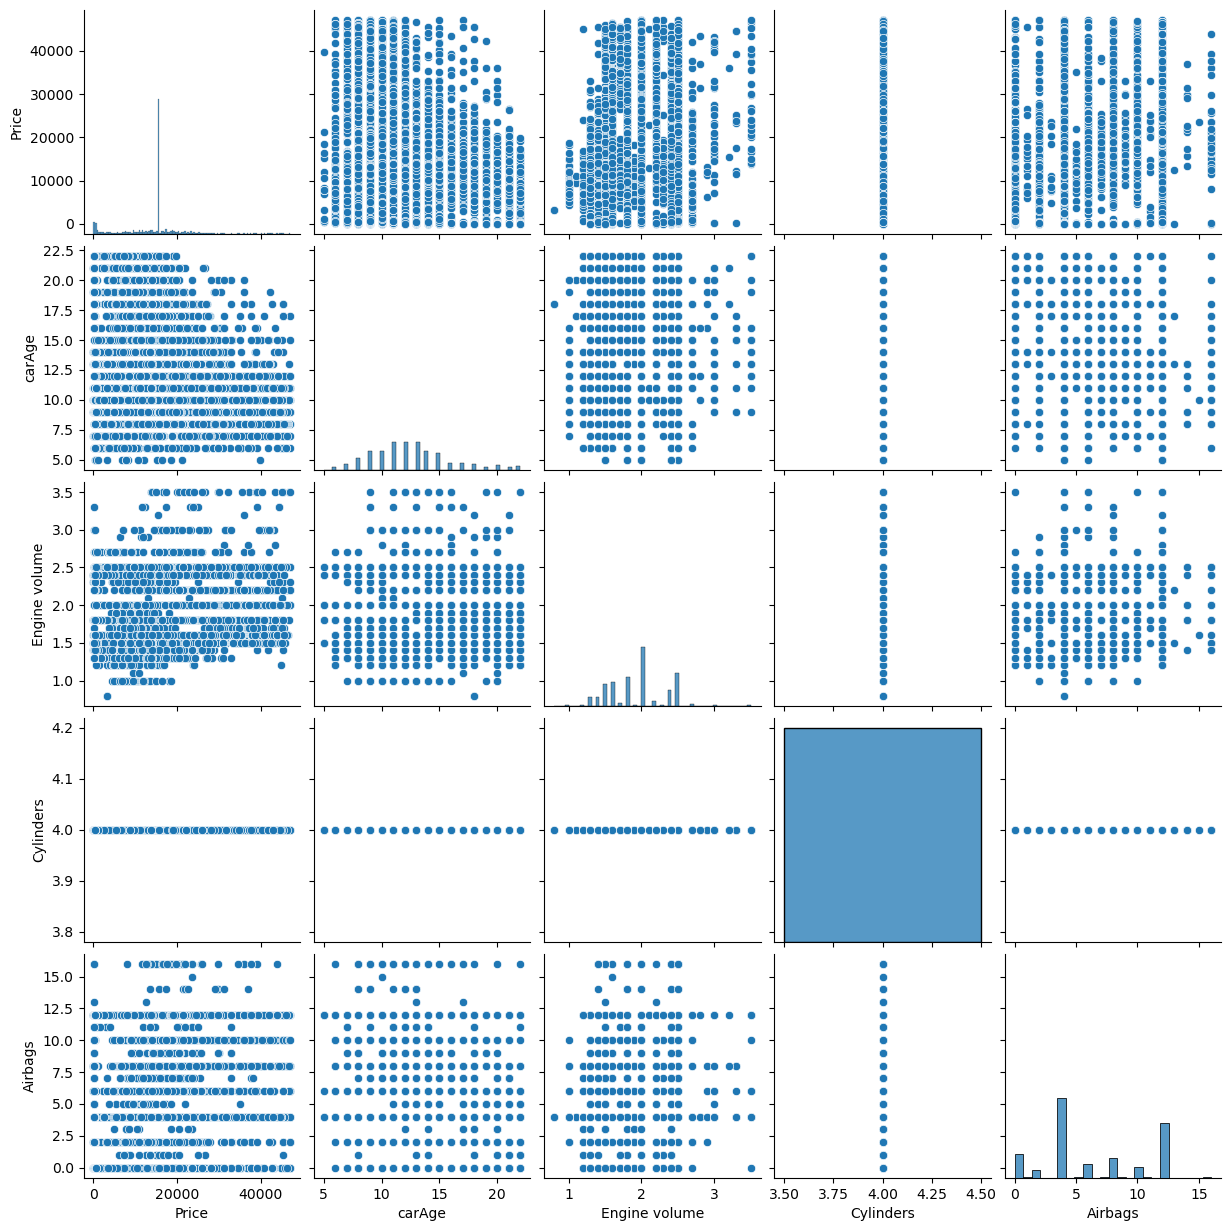

In [1308]:
sns.pairplot(data[['Price', 'carAge', 'Engine volume', 'Cylinders', 'Airbags']])
plt.show()

Levy Column

In [1258]:
data.Levy.replace({'-' : '0'} , inplace=True)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_37260\1222067833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Levy.replace({'-' : '0'} , inplace=True)


In [1259]:
data['Levy'] = data.Levy.astype('int')

In [1260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  carAge            18924 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(11)

Mileage Columns

In [1261]:
data["Mileage"] = data["Mileage"].str.replace('km', '')

In [1262]:
data["Mileage"] = data["Mileage"].astype('int')

In [1263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  int32  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  carAge            18924 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(10)

Engine volume

In [1264]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [1265]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo' , '')

In [1266]:
data['Engine volume'] = data['Engine volume'].astype('float')

In [1267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  int32  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  carAge            18924 non-null  int32  
dtypes: float64(2), int32(3), int64(2), object(9)


Detect the Outlieres

In [1268]:
numeric_data = data.select_dtypes(exclude='object')

for col in numeric_data.columns:
    q1 = numeric_data[col].quantile(0.25)
    q3 = numeric_data[col].quantile(0.75)
    
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    outliers = numeric_data[(numeric_data[col] < low) | (numeric_data[col] > high)]
    num_outliers = outliers.shape[0]
    
    total = numeric_data[col].shape[0]
    percent = (num_outliers / total) * 100
    
    print(f"Number of outliers in {col} is: {num_outliers}")
    print(f"The percentage of outliers in {col} is: {round(percent, 2)}%")
    
    if num_outliers > 0:
        numeric_data = numeric_data.loc[(numeric_data[col] >= low) & (numeric_data[col] <= high)]



Number of outliers in Price is: 1055
The percentage of outliers in Price is: 5.57%
Number of outliers in Levy is: 161
The percentage of outliers in Levy is: 0.9%
Number of outliers in Engine volume is: 1034
The percentage of outliers in Engine volume is: 5.84%
Number of outliers in Mileage is: 637
The percentage of outliers in Mileage is: 3.82%
Number of outliers in Cylinders is: 3127
The percentage of outliers in Cylinders is: 19.5%
Number of outliers in Airbags is: 0
The percentage of outliers in Airbags is: 0.0%
Number of outliers in carAge is: 1111
The percentage of outliers in carAge is: 8.61%


In [1269]:
numeric_data

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,carAge
2,8467,0,1.3,200000,4.0,2,19
3,3607,862,2.5,168966,4.0,0,14
4,11726,446,1.3,91901,4.0,4,11
5,39493,891,2.0,160931,4.0,4,9
6,1803,761,1.8,258909,4.0,12,15
...,...,...,...,...,...,...,...
19230,470,645,1.8,307325,4.0,12,14
19233,15681,831,2.4,161600,4.0,8,14
19234,26108,836,2.0,116365,4.0,4,15
19235,5331,1288,2.0,51258,4.0,4,18


In [1270]:
object_data = data.select_dtypes('object')

Encoding Object Data

In [1271]:
l =LabelEncoder()

for col in object_data.columns:
    object_data[col] =l.fit_transform(object_data[col])
 
 


In [1272]:
data = pd.concat([numeric_data , object_data] , axis=1)
data

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,carAge,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,8467.0,0.0,1.3,200000.0,4.0,2.0,19.0,21,684,3,0,5,3,1,1,1
3,3607.0,862.0,2.5,168966.0,4.0,0.0,14.0,16,661,4,1,2,0,0,0,14
4,11726.0,446.0,1.3,91901.0,4.0,4.0,11.0,21,684,3,1,5,0,1,0,12
5,39493.0,891.0,2.0,160931.0,4.0,4.0,9.0,23,1305,4,1,1,0,1,0,14
6,1803.0,761.0,1.8,258909.0,4.0,12.0,15.0,58,1154,3,1,2,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,1329,9,1,5,2,2,1,14
19227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,0,0,1
19228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,2,0,1
19231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,2,0,7


In [1273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 2 to 19232
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             11799 non-null  float64
 1   Levy              11799 non-null  float64
 2   Engine volume     11799 non-null  float64
 3   Mileage           11799 non-null  float64
 4   Cylinders         11799 non-null  float64
 5   Airbags           11799 non-null  float64
 6   carAge            11799 non-null  float64
 7   Manufacturer      18924 non-null  int32  
 8   Model             18924 non-null  int32  
 9   Category          18924 non-null  int32  
 10  Leather interior  18924 non-null  int32  
 11  Fuel type         18924 non-null  int32  
 12  Gear box type     18924 non-null  int32  
 13  Drive wheels      18924 non-null  int32  
 14  Wheel             18924 non-null  int32  
 15  Color             18924 non-null  int32  
dtypes: float64(7), int32(9)
memory usage: 1.8 MB


Create Model

In [1274]:
x = data.drop("Price" , axis=1)

y = data["Price"]

In [1275]:
x

,Levy,Engine volume,Mileage,Cylinders,Airbags,carAge,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,0.0,1.3,200000.0,4.0,2.0,19.0,21,684,3,0,5,3,1,1,1
3,862.0,2.5,168966.0,4.0,0.0,14.0,16,661,4,1,2,0,0,0,14
4,446.0,1.3,91901.0,4.0,4.0,11.0,21,684,3,1,5,0,1,0,12
5,891.0,2.0,160931.0,4.0,4.0,9.0,23,1305,4,1,1,0,1,0,14
6,761.0,1.8,258909.0,4.0,12.0,15.0,58,1154,3,1,2,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19226,NaN,NaN,NaN,NaN,NaN,NaN,41,1329,9,1,5,2,2,1,14
19227,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,0,0,1
19228,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,2,0,1
19231,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,2,0,7


In [1276]:
x.isna().sum()

Levy                7125
Engine volume       7125
Mileage             7125
Cylinders           7125
Airbags             7125
carAge              7125
Manufacturer           0
Model                  0
Category               0
Leather interior       0
Fuel type              0
Gear box type          0
Drive wheels           0
Wheel                  0
Color                  0
dtype: int64

In [1277]:
for i in x.columns:
    if x[i].isna().any():  
        x[i].fillna(x[i].mean(), inplace=True)  

C:\Users\mostafa\AppData\Local\Temp\ipykernel_37260\25483705.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[i].fillna(x[i].mean(), inplace=True)


In [1278]:
x

,Levy,Engine volume,Mileage,Cylinders,Airbags,carAge,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,0.000000,1.300000,200000.000000,4.0,2.000000,19.000000,21,684,3,0,5,3,1,1,1
3,862.000000,2.500000,168966.000000,4.0,0.000000,14.000000,16,661,4,1,2,0,0,0,14
4,446.000000,1.300000,91901.000000,4.0,4.000000,11.000000,21,684,3,1,5,0,1,0,12
5,891.000000,2.000000,160931.000000,4.0,4.000000,9.000000,23,1305,4,1,1,0,1,0,14
6,761.000000,1.800000,258909.000000,4.0,12.000000,15.000000,58,1154,3,1,2,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19226,596.045343,1.935783,122518.359861,4.0,6.411306,12.570133,41,1329,9,1,5,2,2,1,14
19227,596.045343,1.935783,122518.359861,4.0,6.411306,12.570133,36,601,9,1,1,0,0,0,1
19228,596.045343,1.935783,122518.359861,4.0,6.411306,12.570133,36,601,9,1,1,0,2,0,1
19231,596.045343,1.935783,122518.359861,4.0,6.411306,12.570133,36,601,9,1,1,0,2,0,7


In [1279]:
y

2         8467.0
3         3607.0
4        11726.0
5        39493.0
6         1803.0
          ...   
19226        NaN
19227        NaN
19228        NaN
19231        NaN
19232        NaN
Name: Price, Length: 18924, dtype: float64

In [1280]:
y.fillna(y.mean() , inplace=True)

In [1281]:
y

2         8467.000000
3         3607.000000
4        11726.000000
5        39493.000000
6         1803.000000
             ...     
19226    15483.044156
19227    15483.044156
19228    15483.044156
19231    15483.044156
19232    15483.044156
Name: Price, Length: 18924, dtype: float64

In [1282]:
x_train,x_test,y_train , y_test = train_test_split(x  , y , test_size=0.2)

model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = SVR()
model4 = DecisionTreeRegressor()
model5 = GradientBoostingRegressor()
model6 = XGBRegressor()

In [1283]:
mean_absolute_error_list = []
mean_squared_error_list = []
r2_score_list = []
triang_score_list = []
testing_score_list = []

In [1284]:
def modeling(model):
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    mean_abs = mean_absolute_error(y_test , y_pred)
    mean_aq = np.sqrt(mean_squared_error(y_test , y_pred))
    r2 = r2_score(y_test , y_pred)
    triang_score = model.score(x_train  , y_train)
    testing_score = model.score(x_test , y_test)

    print(f"{model} training score is {triang_score}  and testing score is {testing_score}")

    mean_absolute_error_list.append(mean_abs)
    mean_squared_error_list.append(mean_aq)
    r2_score_list.append(r2)
    triang_score_list.append(triang_score)
    testing_score_list.append(testing_score)



In [1285]:
modeling(model1)
modeling(model2)
modeling(model3)
modeling(model4)
modeling(model5)
modeling(model6)

LinearRegression() training score is 0.19971160211140782  and testing score is 0.1833357399787543
RandomForestRegressor() training score is 0.9664743557802824  and testing score is 0.7838364489800046
SVR() training score is 0.009918515054124222  and testing score is 0.009700491367306219
DecisionTreeRegressor() training score is 0.9963179092069859  and testing score is 0.5980289587353952
GradientBoostingRegressor() training score is 0.6821112785780121  and testing score is 0.6529865911690742
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step

In [1286]:
columns =["LinearRegression" ,"RandomForestRegressor" ,"SVR","DecisionTreeRegressor","GradientBoostingRegressor","XGBRegressor"]

df = {"Algorithm" : columns , "mean_absolute_error" : mean_absolute_error_list , "mean_squared_error" : mean_squared_error_list , "r2_score" : r2_score_list , "training_score" : triang_score_list ,"testing_score" : testing_score_list }

df= pd.DataFrame(df)
df

,Algorithm,mean_absolute_error,mean_squared_error,r2_score,training_score,testing_score
0,LinearRegression,5395.279012,7866.300488,0.183336,0.199712,0.183336
1,RandomForestRegressor,1944.459755,4047.063236,0.783836,0.966474,0.783836
2,SVR,5309.600673,8662.276435,0.009700,0.009919,0.009700
3,DecisionTreeRegressor,2493.947523,5518.818872,0.598029,0.996318,0.598029
4,GradientBoostingRegressor,3033.723850,5127.691464,0.652987,0.682111,0.652987
5,XGBRegressor,2169.167604,4201.348709,0.767041,0.916777,0.767041


In [1288]:
import pickle
file_name = "Cars_prediction_model.sav"
pickle.dump(model2 , open(file_name,'wb'))